# 因素分析(Factor Analysis)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import logging
import matplotlib.pyplot as plt
from numpy import random
from tqdm.notebook import tqdm
from random import choices

# Dataset

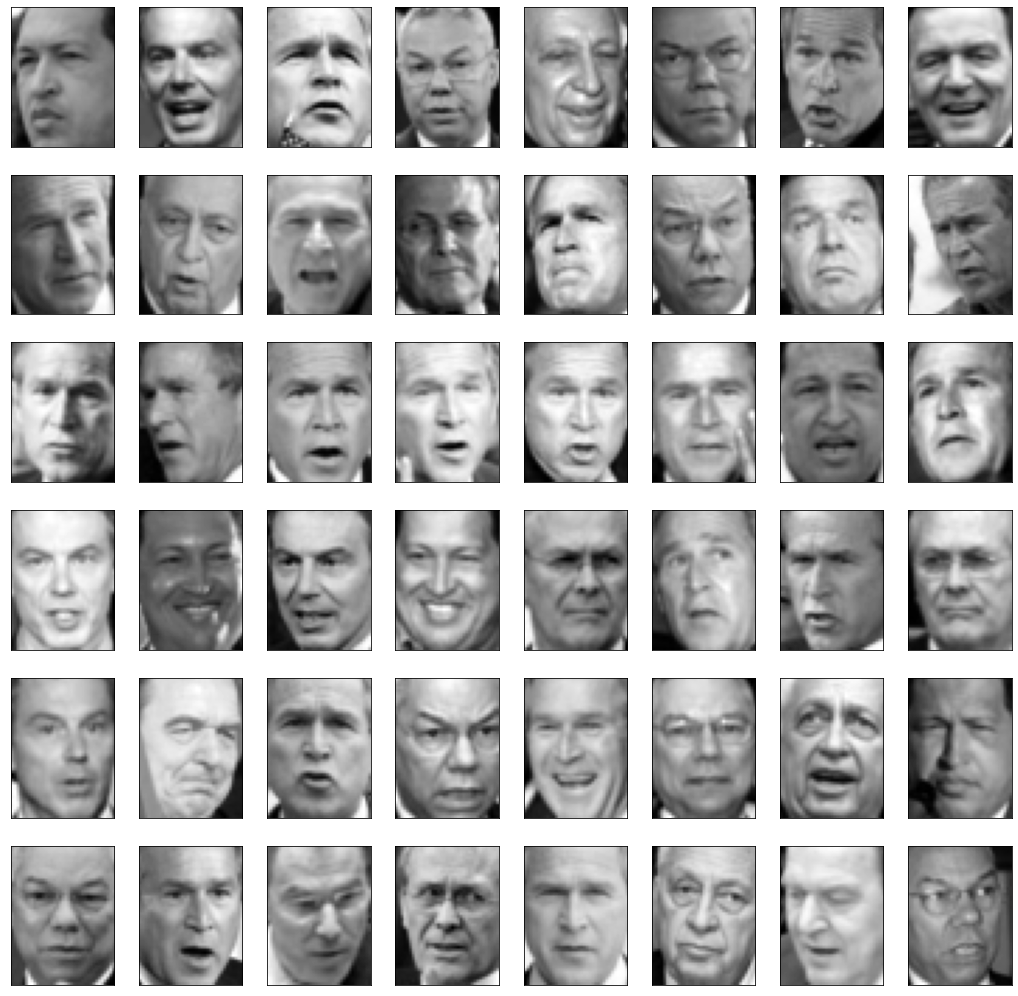

In [2]:
from sklearn.datasets import fetch_lfw_people
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X=lfw_people.data/256
y=lfw_people.target
n_samples, h, w = lfw_people.images.shape
X=X.T
plt.rcParams["figure.figsize"] = (18,18)
plt.gray()
for i in range(48):
    plt.subplot(6, 8, i + 1)
    plt.imshow(X[:,i].reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.show() 

# Factor Analysis

In [5]:
M,N=X.shape
H=30
X_mean=np.mean(X,axis=1)
X_norm=X-X_mean[:,None]
S=np.dot(X_norm,X_norm.T)/N
psi=np.diag(np.random.rand(M))
for i in tqdm(range(10)):
    psi_temp=np.linalg.inv(psi**0.5)
    S_lam=np.dot(np.dot(psi_temp,S),psi_temp)
    V,U=np.linalg.eig(S_lam)
    F=np.dot(np.dot(psi**0.5,U[:,:H]),(np.diag(V[:H])-np.diag(np.ones(H)))**0.5)
    psi=np.diag((S-np.dot(F,F.T)).diagonal())

# Plot

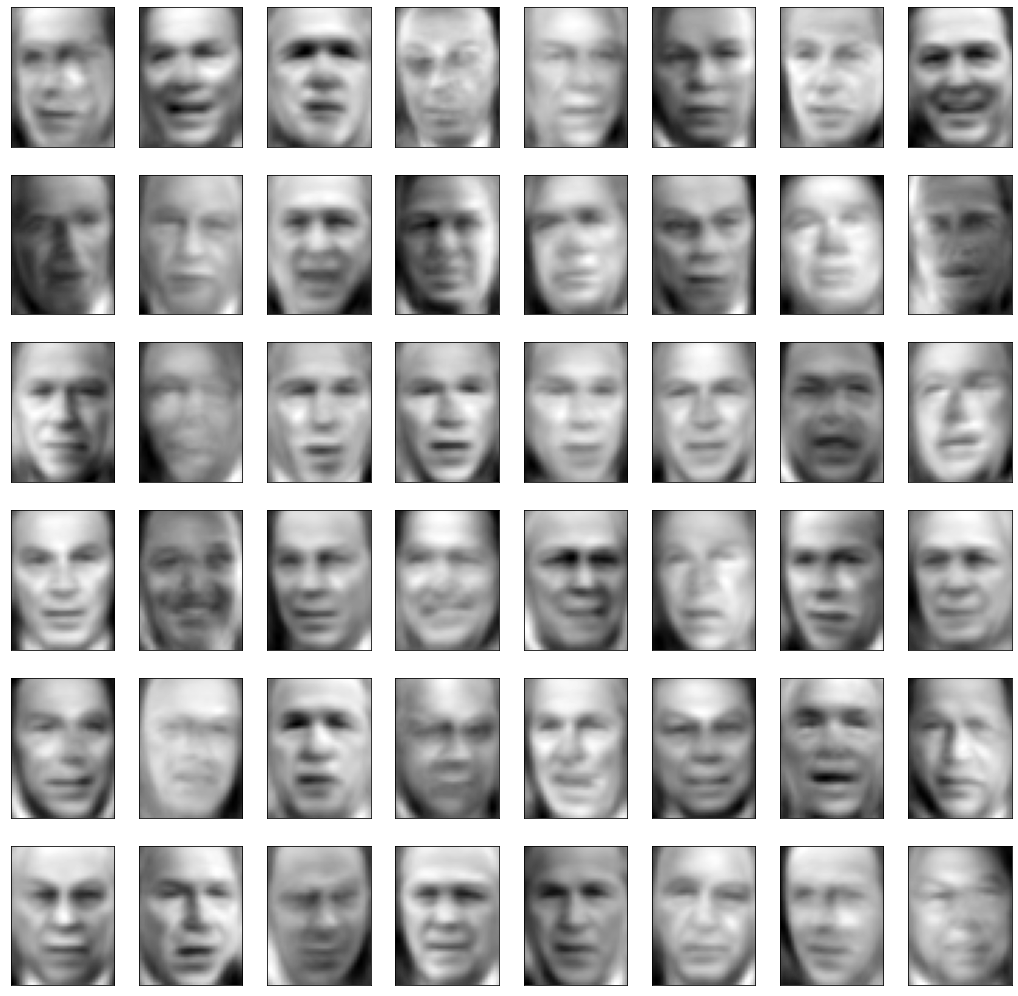

In [6]:
H=np.dot(np.dot(np.linalg.inv(np.dot(F.T,F)),F.T),X_norm)
X_rec=np.dot(F,H)+X_mean[:,None]
plt.rcParams["figure.figsize"] = (18,18)
plt.gray()
for i in range(48):
    plt.subplot(6, 8, i + 1)
    plt.imshow(X_rec[:,i].reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.show() 